# 1. 建立數據集¶
- 一個一元二次函數: y = a * x^2 + b
- 給 y 數據加上一點 noise 來更加真實的展示它

In [1]:
import torch
import torch.nn.functional as F
from torch.autograd import Variable
import matplotlib.pyplot as plt

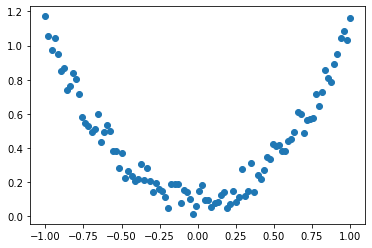

In [2]:
x = torch.unsqueeze(torch.linspace(-1, 1, 100), dim = 1) # x data (tensor), shape=(100,1) # unsqueeze : 一維變二維
y = x.pow(2) + 0.2 * torch.rand(x.size())                # noisy y data (tensor), shape=(100, 1)

x, y = Variable (x), Variable (y)

# 散佈圖
plt.scatter(x.data.numpy(), y.data.numpy())
plt.show()

# 2. 建立神經網路

In [3]:
class Net (torch.nn.Module):  # 繼承 torch 的 Module
    def __init__(self, n_feature, n_hidden, n_output):
        super(Net, self).__init__()  # 繼承 __init__ 功能
        # Define every layer
        self.hidden = torch.nn.Linear (n_feature, n_hidden) # output is linear in the hidden layer
        self.predict = torch.nn.Linear (n_hidden, n_output) # output is linear in the output layer
              
    def forward(self, x): # 這也是 Module 中的 forward 功能
        # 正向傳播輸入值, 神經網路分析出輸出值
        x = F.relu(self.hidden(x))  # Activation function (隱藏層的線性值)
        x = self.predict(x)         # 不用 Activation function，不希望數值被截斷
        return x
    
net = Net(n_feature = 1, n_hidden = 10, n_output = 1)
print (net)  # net 的結構

Net(
  (hidden): Linear(in_features=1, out_features=10, bias=True)
  (predict): Linear(in_features=10, out_features=1, bias=True)
)


# 3. 訓練網路

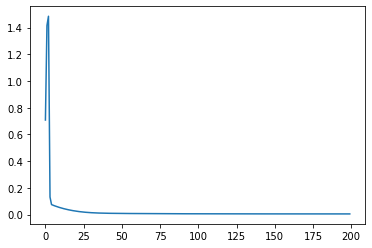

In [4]:
# optimizer 是訓練的工具
optimizer = torch.optim.SGD (net.parameters(), lr = 0.5) # 傳入 net 的所有參數
loss_func = torch.nn.MSELoss() # 預測值和真實值的誤差計算公式

LOSS = []
epochs = 200
for t in range (epochs):
    prediction = net (x)   # 餵给 net 訓練數據 x, 輸出預測值
    loss = loss_func (prediction, y)  # 計算兩者的誤差
    LOSS.append (loss.item())         # item()用在只包含一個元素的 tensor 中提取值，否則使用.tolist()
    
    optimizer.zero_grad()  # 清空上一步的殘餘更新參數值
    loss.backward()        # 誤差反向傳播, 計算參數更新值
    optimizer.step()       # 將參數更新值施加到 net 的 parameters 上
    
plt.plot (LOSS, label = "Training Loss")
plt.show ()

### ---可視化訓練過程---

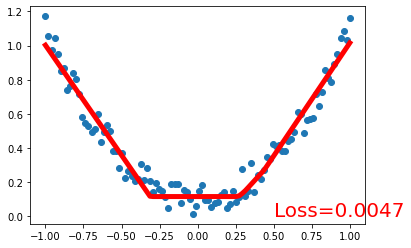

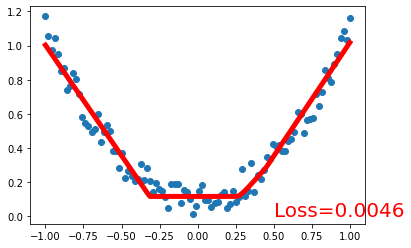

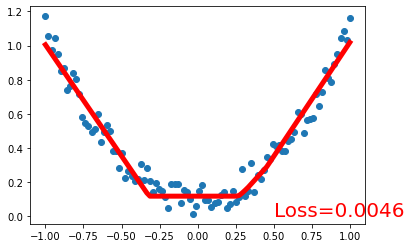

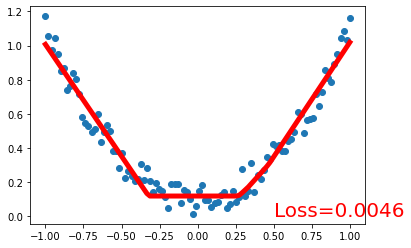

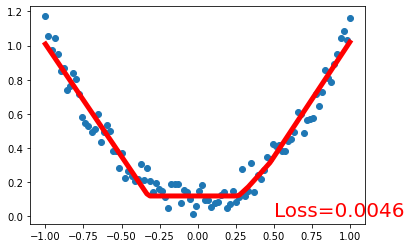

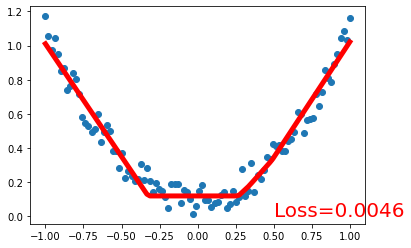

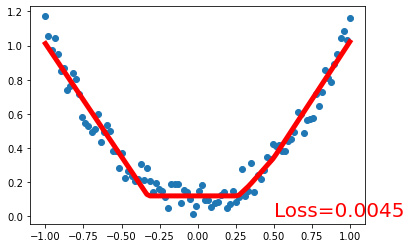

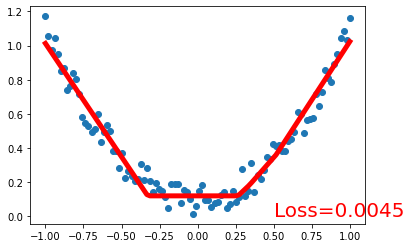

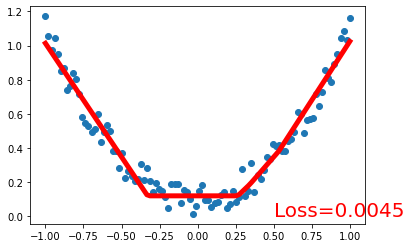

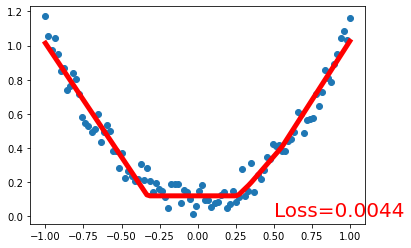

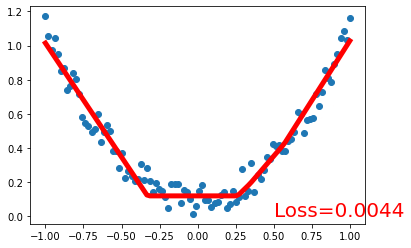

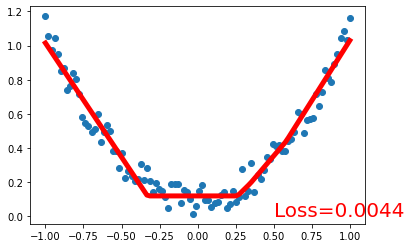

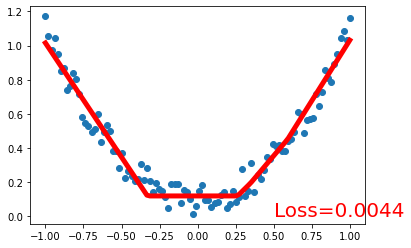

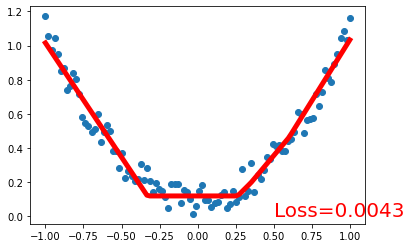

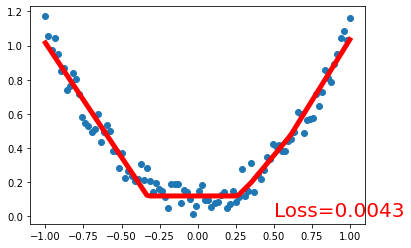

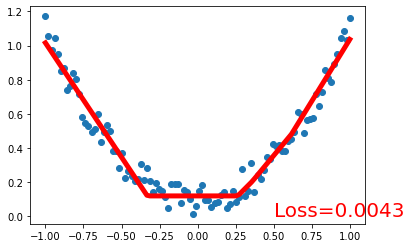

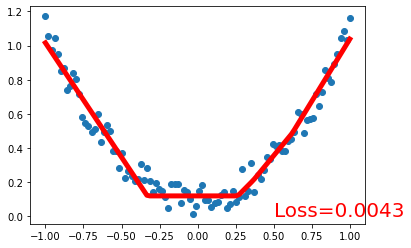

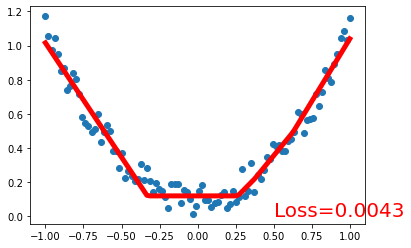

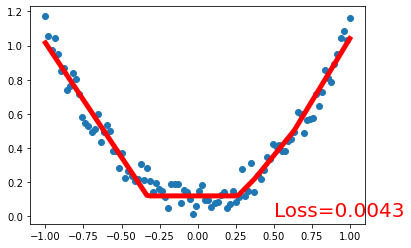

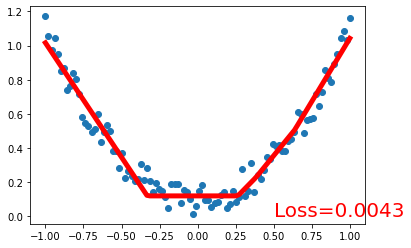

In [5]:
plt.ion()   # 及時畫圖
plt.show()

optimizer = torch.optim.SGD (net.parameters(), lr = 0.5) 
loss_func = torch.nn.MSELoss() 

epochs = 200
for t in range (epochs):
    prediction = net (x)   
    loss = loss_func (prediction, y)  
    
    optimizer.zero_grad()  
    loss.backward()        
    optimizer.step() 

    if t % 10 == 0:
        # plot and show learning process
        plt.cla()
        plt.scatter(x.data.numpy(), y.data.numpy())
        plt.plot(x.data.numpy(), prediction.data.numpy(), 'r-', lw=5)
        plt.text(0.5, 0, 'Loss=%.4f' % loss.data.numpy(), fontdict={'size': 20, 'color':  'red'})
        plt.pause(0.1)

# Reference

https://mofanpy.com/tutorials/machine-learning/torch/regression